In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

#### Function To Save the Figures

In [2]:
import matplotlib.pyplot as plt 
import os 
def save_fig(img_name , path = 'Images' ,tight_layout = True,format = '.png', dpi = 'resolution'):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(os.path.join(path , img_name+format))

# Importing the training and test set

In [151]:
train = pd.read_csv('Dataset/train_set.csv')

train_set =train.copy()

In [4]:
train_set.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
train.tail(10)

,id,label,tweet
31952,31953,0,@user you went too far with @user
31953,31954,0,good morning #instagram #shower #water #berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


id : The id associated with the tweets in the given dataset.

tweets : The tweets collected from various sources and having either positive or negative sentiments associated with it.

label : A tweet with label ‘0’ is of positive sentiment while a tweet with label ‘1’ is of negative sentiment.


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
train_set['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
test = pd.read_csv('Dataset/train_set.csv')

test_set =test.copy()

In [9]:
test_set.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [10]:
test_set.tail(10)

,id,tweet
17187,49150,loving lifeðºð¸âï¸ð #createyourfutu...
17188,49151,"black professor demonizes, proposes nazi style..."
17189,49152,learn how to think positive. #positive #ins...
17190,49153,"we love the pretty, happy and fresh you! #teen..."
17191,49154,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [11]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [12]:
combine = train_set.append(test_set , ignore_index = True)
combine.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_5500\2888266488.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train_set.append(test_set , ignore_index = True)


,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [13]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


# Text Preprocessing

### Removing !@user from tweets

In [14]:
import re 

def remove_patterns(text , pattern):
    pattern = re.compile(pattern) 
    text = pattern.sub("" , text) 
    return text 

In [16]:
combine['cleaned_tweet'] = np.vectorize(remove_patterns)(combine['tweet'] , '@[\w]*')

In [17]:
combine['cleaned_tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
49154    thought factory: left-right polarisation! #tru...
49155    feeling like a mermaid ð #hairflip #neverre...
49156    #hillary #campaigned today in #ohio((omg)) &am...
49157    happy, at work conference: right mindset leads...
49158    my   song "so glad" free download!  #shoegaze ...
Name: cleaned_tweet, Length: 49159, dtype: object

#### Removing Digits

In [18]:
combine['cleaned_tweet'] = combine['cleaned_tweet'].str.replace("[^a-zA-Z#]" , " ")

C:\Users\Dell\AppData\Local\Temp\ipykernel_5500\237457399.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['cleaned_tweet'] = combine['cleaned_tweet'].str.replace("[^a-zA-Z#]" , " ")


In [19]:
combine['cleaned_tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can t use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
                               ...                        
49154    thought factory  left right polarisation  #tru...
49155    feeling like a mermaid      #hairflip #neverre...
49156    #hillary #campaigned today in #ohio  omg    am...
49157    happy  at work conference  right mindset leads...
49158    my   song  so glad  free download   #shoegaze ...
Name: cleaned_tweet, Length: 49159, dtype: object

### Removing Short Words

Words having length <3 would be removed from every tweet

In [20]:
combine['cleaned_tweet'] = combine['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [21]:
combine.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


### Tokenization

In [22]:
tokenized_tweet = combine['cleaned_tweet'].apply(lambda x : x.split())
tokenized_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: cleaned_tweet, Length: 49159, dtype: object

In [23]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer ()

tokenized_tweet = tokenized_tweet.apply(lambda x : [lemmatizer.lemmatize(word , 'a') for word in x])
tokenized_tweet = tokenized_tweet.apply(lambda x : [lemmatizer.lemmatize(word , 'v') for word in x])


tokenized_tweet

0        [when, father, dysfunctional, selfish, drag, k...
1        [thank, #lyft, credit, cause, they, offer, whe...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [think, factory, leave, right, polarisation, #...
49155    [feel, like, mermaid, #hairflip, #neverready, ...
49156    [#hillary, #campaigned, today, #ohio, use, wor...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: cleaned_tweet, Length: 49159, dtype: object

In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['cleaned_tweet'] = tokenized_tweet
combine.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drag kid int...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cause they offer wheelchair...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


# Visualization

In [25]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### WordCloud 

In [26]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

#### Positive Words

In [49]:
all_words_positive = ' '.join(text for text in combine['cleaned_tweet'][combine['label']==0])
print(all_words_positive)

when father dysfunctional selfish drag kid into dysfunction #run thank #lyft credit cause they offer wheelchair vans #disapointed #getthanked bihday your majesty #model love take with time factsguide society #motivation huge fare talk before they leave chaos dispute when they there #allshowandnogo camp tomorrow danny next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl love land #allin #cavs #champions #cleveland #clevelandcavaliers welcome here #ireland consumer price index climb from previous #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love daddy today days #gettingfed ouch junior angry #got #junior #yugyoem #omg thankful have paner #thankful #positive #friday smile around user #cookies make people know essential oil make chemicals #euro people blame concede goal rooney give away free kick know bale them from there little dude #bad

In [28]:

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wordcloud_1 = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

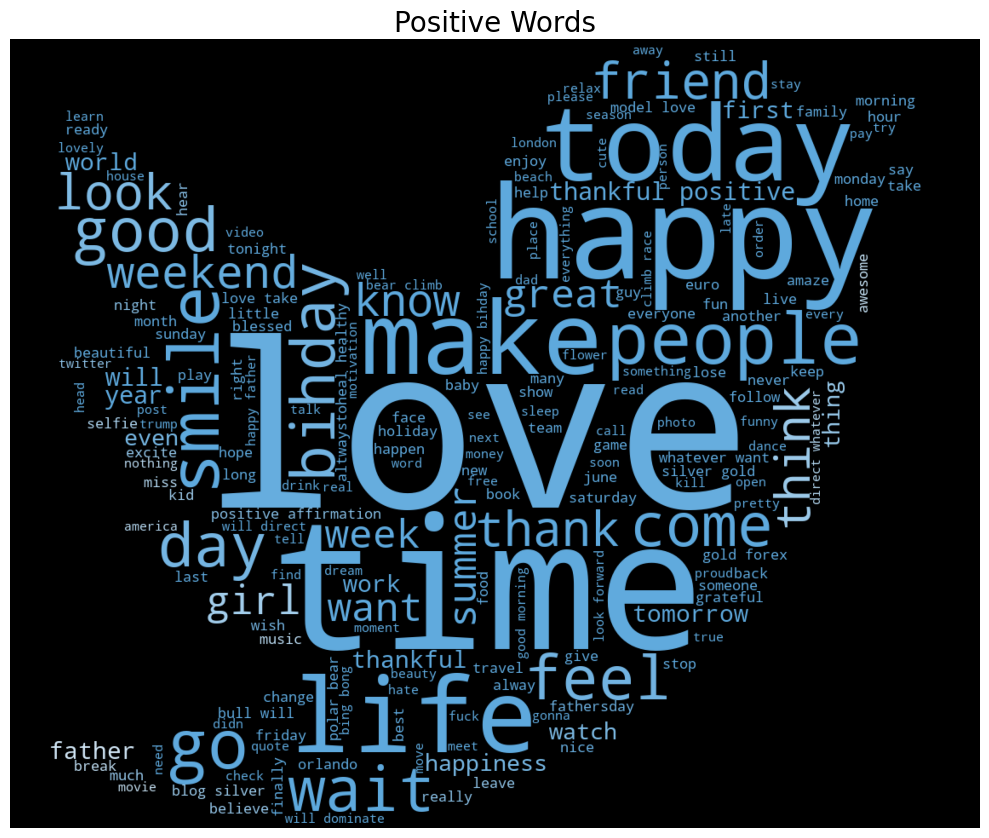

In [134]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wordcloud_1.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.title('Positive Words' , fontdict = {'fontsize' : 20})
save_fig('positive words wordcloud')
plt.show()


#### Negative Words

In [30]:
all_words_negative = ' '.join(text for text in combine['cleaned_tweet'][combine['label']==1])

In [31]:
wordcloud_2 = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

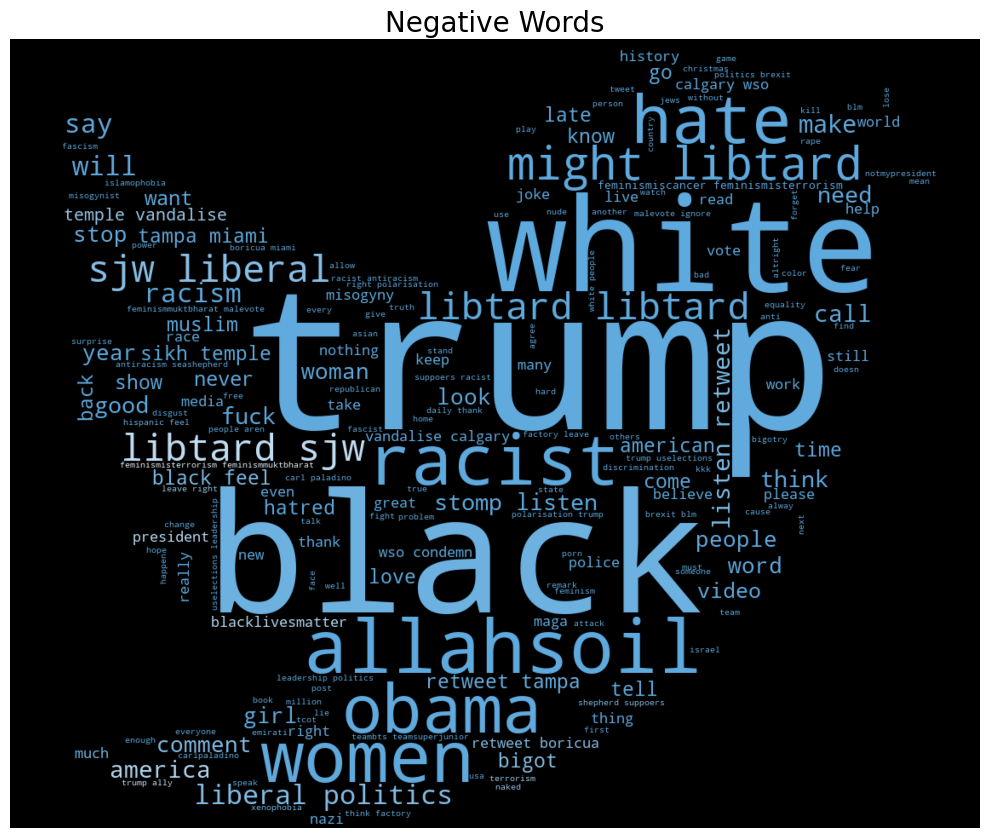

In [133]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wordcloud_2.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.title('Negative Words' , fontdict = {'fontsize' : 20})
save_fig('Negative words wordcloud')
plt.show()

## Extracting Hashtags and visualizing them

In [135]:
def Hashtags_Extract(x):
    hashtags=[]
    pattern = re.compile(r'#[\w+]*')
    hashtags = pattern.findall(x)
    return hashtags

#### Positive Hashtags

In [136]:
ht_positive = combine['cleaned_tweet'][combine['label'] == 0].apply(Hashtags_Extract)
ht_positive

0                                    [#run]
1        [#lyft, #disapointed, #getthanked]
2                                        []
3                                  [#model]
4                             [#motivation]
                        ...                
31956                                    []
31957                                    []
31958                  [#shame, #imwithher]
31959                                    []
31961                                    []
Name: cleaned_tweet, Length: 29720, dtype: object

In [34]:
positive_hashtags = []
def add_hashtags(x,hashtags):
    for list in x:
        if len(list) >= 1:
            for i in list: 
                hashtags.append(i)
            
add_hashtags(ht_positive , positive_hashtags)

In [35]:
print(positive_hashtags[:100])

['#run', '#lyft', '#disapointed', '#getthanked', '#model', '#motivation', '#allshowandnogo', '#school', '#exams', '#hate', '#imagine', '#actorslife', '#revolutionschool', '#girl', '#allin', '#cavs', '#champions', '#cleveland', '#clevelandcavaliers', '#ireland', '#blog', '#silver', '#gold', '#forex', '#orlando', '#standwithorlando', '#pulseshooting', '#orlandoshooting', '#biggerproblems', '#selfish', '#heabreaking', '#values', '#love', '#gettingfed', '#got', '#junior', '#yugyoem', '#omg', '#thankful', '#positive', '#friday', '#cookies', '#euro', '#badday', '#coneofshame', '#cats', '#pissed', '#funny', '#laughs', '#wine', '#weekend', '#tgif', '#gamedev', '#indiedev', '#indiegamedev', '#squad', '#upsideofflorida', '#shopalyssas', '#love', '#smiles', '#media', '#pressconference', '#antalya', '#turkey', '#throwback', '#ica', '#rip', '#orlando', '#alohafriday', '#time', '#not', '#exist', '#positivevibes', '#hawaiian', '#goodnight', '#badmonday', '#taylorswift', '#travelingram', '#dalat', '#r

In [36]:
from collections import Counter 
positive_hashtags_counter = Counter(positive_hashtags)

In [37]:
positive_hashtags_counter = pd.concat([pd.Series(positive_hashtags_counter.keys()) , pd.Series(positive_hashtags_counter.values())] , axis = 1)
positive_hashtags_counter = positive_hashtags_counter.rename({0 : 'hashtags', 1 : 'counter'} , axis = 1)
positive_hashtags_counter = positive_hashtags_counter.sort_values('counter' , ascending = False)

In [38]:
positive_hashtags_counter

,hashtags,counter
32,#love,1596
39,#positive,880
207,#smile,581
159,#healthy,576
38,#thankful,496
...,...,...
9639,#twintuesday,1
9640,#wheelyfunday,1
9641,#livemoreyha,1
9642,#fixturesreleaseday,1


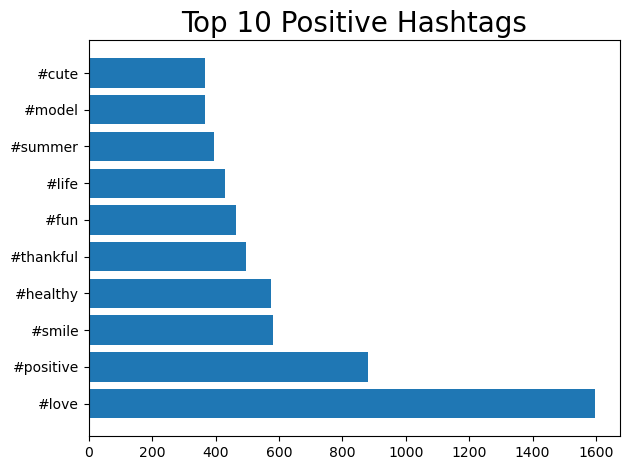

In [142]:
plt.barh(positive_hashtags_counter.iloc[:10]['hashtags'] , positive_hashtags_counter.iloc[:10]['counter'])
plt.title('Top 10 Positive Hashtags', fontdict = {'fontsize' : 20})
save_fig('Top 10 Positive Hashtags')
plt.show()

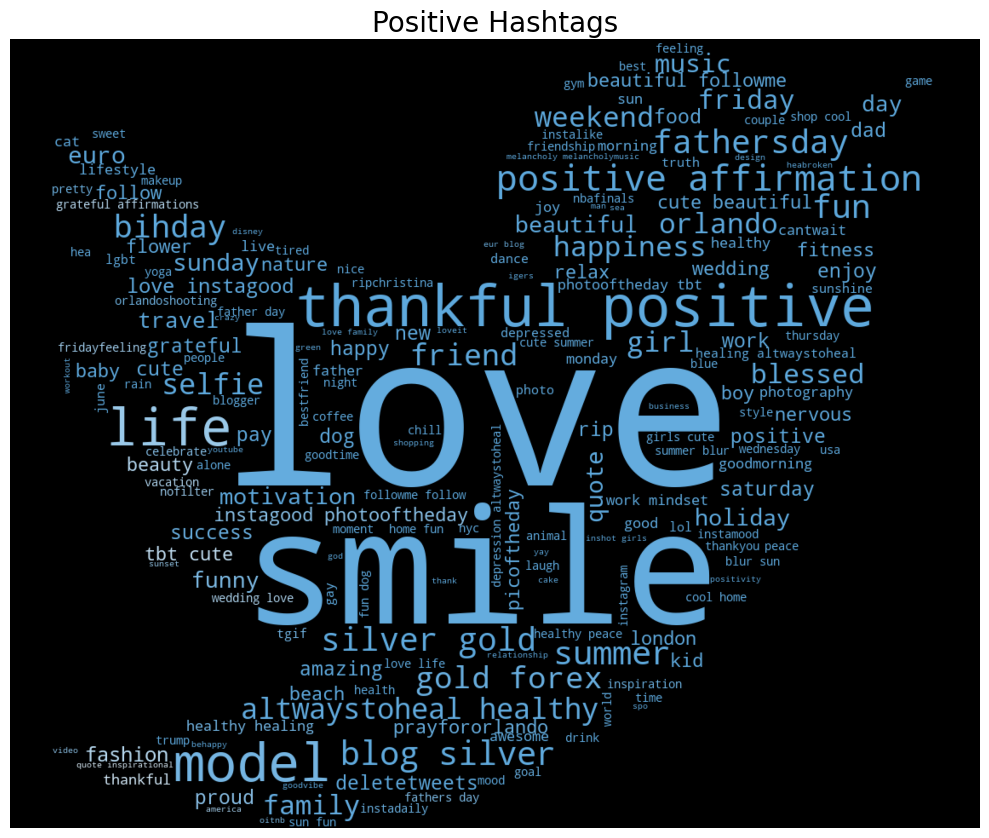

In [140]:
wordcloud_3  = WordCloud(background_color = 'black',
                        mask = Mask,
                        color_func = image_colors).generate(' '.join(word for word in positive_hashtags))

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wordcloud_3.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.title('Positive Hashtags' , fontdict = {'fontsize' : 20})
save_fig('Positive hashtags WordCloud')
plt.show()

#### Negative Hashtags

In [41]:
ht_negative = combine['cleaned_tweet'][combine['label'] == 1].apply(Hashtags_Extract)
ht_negative

13                                [#cnn, #michigan, #tcot]
14       [#australia, #opkillingbay, #seashepherd, #hel...
17                                                      []
23                                                      []
34                                [#neverump, #xenophobia]
                               ...                        
31934                                [#jcpenny, #kentucky]
31946                        [#mailboxpride, #liberalisme]
31947                                                   []
31948                                                   []
31960                     [#sikh, #temple, #calgary, #wso]
Name: cleaned_tweet, Length: 2242, dtype: object

In [42]:
negative_hashtags = [] 
add_hashtags(ht_negative,negative_hashtags)

In [43]:
print(negative_hashtags[:100])

['#cnn', '#michigan', '#tcot', '#australia', '#opkillingbay', '#seashepherd', '#helpcovedolphins', '#thecove', '#helpcovedolphins', '#neverump', '#xenophobia', '#love', '#peace', '#race', '#identity', '#med', '#altright', '#whitesupremacy', '#linguistics', '#race', '#power', '#raciolinguistics', '#brexit', '#people', '#trump', '#republican', '#michelleobama', '#knicks', '#golf', '#jewishsupremacist', '#libtard', '#sjw', '#liberal', '#politics', '#trash', '#hate', '#stereotyping', '#prejudice', '#hope', '#hate', '#conflict', '#pols', '#bluelivesmatter', '#draintheswamp', '#ferguson', '#antisemitism', '#hocoschools', '#columbiamd', '#hocomd', '#nazi', '#hatred', '#bigotry', '#libtard', '#sjw', '#liberal', '#politics', '#fyi', '#tcot', '#topoli', '#blacklivesmatter', '#ushistory', '#eugenics', '#biherism', '#bigotry', '#altright', '#potus', '#theresistance', '#crime', '#officer', '#black', '#retweet', '#tampa', '#miami', '#allahsoil', '#praised', '#cleveland', '#rnc', '#white', '#tamirric

In [44]:
len(negative_hashtags)

4622

In [45]:
negative_hashtags_counter = Counter(negative_hashtags)
negative_hashtags_counter = pd.concat([pd.Series(negative_hashtags_counter.keys()) , pd.Series(negative_hashtags_counter.values())] , axis = 1)
negative_hashtags_counter = negative_hashtags_counter.rename({0 : 'hashtags', 1 : 'counter'} , axis = 1)
negative_hashtags_counter = negative_hashtags_counter.sort_values('counter' , ascending = False)

In [46]:
negative_hashtags_counter

,hashtags,counter
22,#trump,136
31,#politics,95
63,#allahsoil,92
28,#libtard,76
30,#liberal,75
...,...,...
878,#disney,1
877,#cable,1
874,#mattruff,1
873,#horror,1


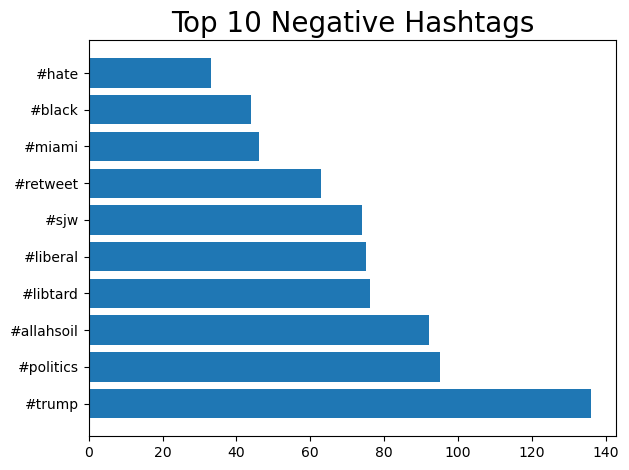

In [145]:
plt.barh(negative_hashtags_counter.iloc[:10]['hashtags'] , negative_hashtags_counter.iloc[:10]['counter'])
plt.title('Top 10 Negative Hashtags' , fontdict = {'fontsize' : 20})
save_fig('Top 10 Negative Hashtags') 
plt.show()

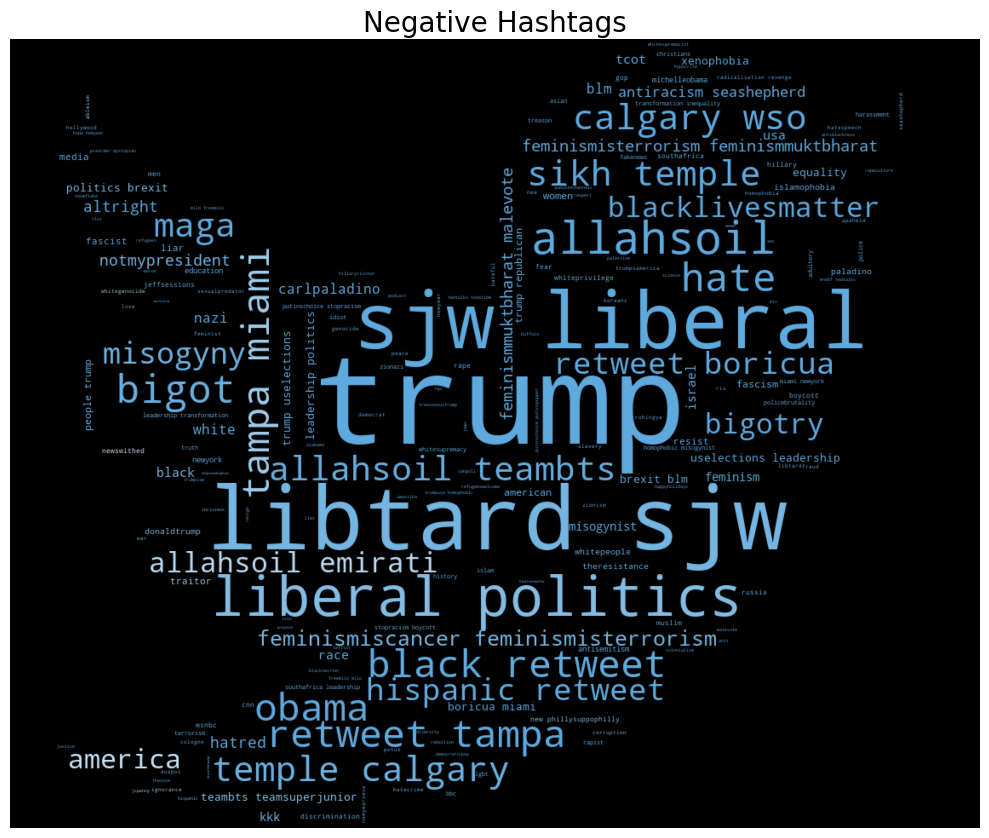

In [146]:
wordcloud_4  = WordCloud(background_color = 'black',
                        mask = Mask,
                        color_func = image_colors).generate(' '.join(word for word in negative_hashtags))

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wordcloud_4.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.title('Negative Hashtags' , fontdict = {'fontsize' : 20})
save_fig('Negative Hashtags WordCloud') 
plt.show()

# Text Vectorization

### Bag Of Words

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
bow_extractor = CountVectorizer(max_df = 0.9 , min_df = 2 , max_features = 1000 , stop_words = 'english') 
bow = bow_extractor.fit_transform(combine['cleaned_tweet'])
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['cleaned_tweet'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

# Model Training

### Logistic Regression

#### Bag of Words Features

In [67]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')
Log_Reg.fit(x_train_bow,y_train_bow)

prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[9.79460326e-01, 2.05396744e-02],
       [9.99340601e-01, 6.59399294e-04],
       [9.24626391e-01, 7.53736086e-02],
       ...,
       [8.61404878e-01, 1.38595122e-01],
       [9.66537246e-01, 3.34627540e-02],
       [9.43598051e-01, 5.64019489e-02]])

In [69]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5476190476190476

#### TF-IDF Features

In [70]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [71]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98221478, 0.01778522],
       [0.97799046, 0.02200954],
       [0.94328169, 0.05671831],
       ...,
       [0.98810111, 0.01189889],
       [0.970126  , 0.029874  ],
       [0.9945997 , 0.0054003 ]])

In [73]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5659388646288209

### XGBoost

#### Bag-of-Words Features

In [75]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.1/124.9 MB 762.6 kB/s eta 0:02:44
   ---------------------------------------- 0.3/124.9 MB 2.3 MB/s eta 0:00:54
   ---------------------------------------- 0.6/124.9 MB 3.2 MB/s eta 0:00:39
   ---------------------------------------- 0.8/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 1.2/124.9 MB 4.1 MB/s eta 0:00:31
   ---------------------------------------- 1.4/124.9 MB 4.1 MB/s eta 0:00:31
    --------------------------------------- 1.7/124.9 MB 4.6 MB/s eta 0:00:28
    --------------------------------------- 1.8/124.9 MB 4.3 MB/s eta 0:00:29
    --------------------------------------- 2.2/124.9 MB 4.6 MB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)
model_bow.fit(x_train_bow, y_train_bow)
xgb = model_bow.predict_proba(x_valid_bow)
xgb

array([[9.8130101e-01, 1.8698970e-02],
       [9.9909258e-01, 9.0743898e-04],
       [9.3468070e-01, 6.5319277e-02],
       ...,
       [9.3570006e-01, 6.4299956e-02],
       [9.3468070e-01, 6.5319277e-02],
       [9.5464450e-01, 4.5355525e-02]], dtype=float32)

In [83]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.5700712589073634

#### TF-IDF Features

In [90]:
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)
model_tfidf.fit(x_train_tfidf, y_train_tfidf)
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)            
xgb_tfidf

array([[9.9729848e-01, 2.7015258e-03],
       [9.8523092e-01, 1.4769101e-02],
       [9.5321190e-01, 4.6788123e-02],
       ...,
       [9.8681051e-01, 1.3189521e-02],
       [9.0030003e-01, 9.9699944e-02],
       [9.9918562e-01, 8.1435620e-04]], dtype=float32)

In [91]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score

0.5581761006289309

### Decision Trees

In [92]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

#### Bag of Words Features

In [96]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

dct.fit(x_train_bow,y_train_bow)

dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ]])

In [97]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.48524203069657607

#### TF-IDF Features

In [98]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [99]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [100]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5429234338747099

# Comparision

#### Bag-of-Words

In [101]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow,xgb_bow,dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.547619,0.570071,0.485242


<Figure size 1800x500 with 0 Axes>

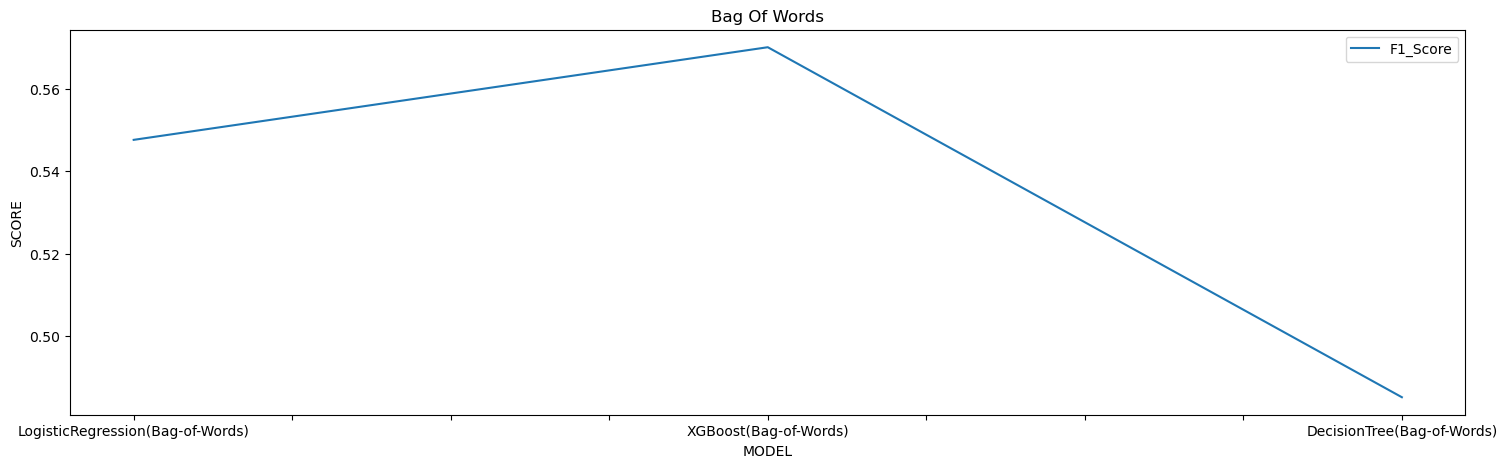

In [121]:
plt.figure(figsize = (18 , 5))
compare_1.plot(kind = 'line' , x = 'Model' , y = 'F1_Score' , figsize = (18,5))
plt.title('Bag Of Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()

#### TF-IDF

In [109]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,score,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.565939,0.558176,0.542923


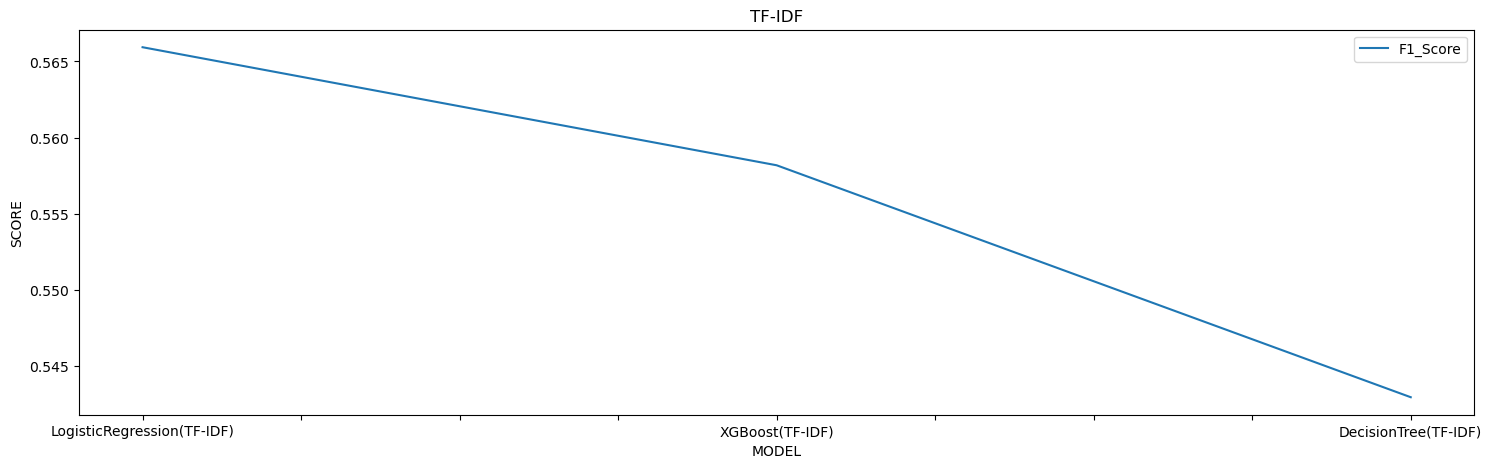

In [122]:
compare_2.plot(x = 'Model' , y = 'F1_Score' , figsize = (18,5))
plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()

In [125]:

test_tfidf = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
